In [4]:
import pandas as pd
import camelot
import json
import glob
import re
import os

In [5]:
tables = camelot.read_pdf(
    '../data/test_data/2022-04-13__深圳世联行集团股份有限公司__002285__世联行__2021年__年度报告.pdf', 
    pages='1-30')

c:\ProgramData\anaconda3\envs\py10\lib\site-packages\camelot\utils.py:740: UserWarning:   (342.22, 345.19000000000005) does not lie in column range (254.28375000000003, 341.70000000000005)
  warnings.warn(
c:\ProgramData\anaconda3\envs\py10\lib\site-packages\camelot\utils.py:740: UserWarning:   (505.39, 507.64) does not lie in column range (89.94, 504.96000000000004)
  warnings.warn(


In [6]:
print(tables[22].df.to_markdown())

|    | 0              | 1            | 2    | 3               | 4                    | 5       | 6       | 7                    | 8                           | 9              |
|---:|:---------------|:-------------|:-----|:----------------|:---------------------|:--------|:--------|:---------------------|:----------------------------|:---------------|
|  0 | 产品类型       | 2021年       |      |                 | 2020年               |         |         | 2019年               |                             |                |
|  1 |                | 金额（万元） | 比重 |                 | 增长率  金额（万元） | 比重    |         | 增长率  金额（万元） | 比重                        | 增长率         |
|  2 | 工商资产运营   | 24,850.03    |      | 45.27%  18.25%  | 21,015.62            | 22.63%  | -12.18% | 23,929.95            |                             | 19.84%  23.65% |
|  3 | 公寓酒店管理   | 14,654.38    |      | 26.70% -73.18%  | 54,633.15            | 58.82%  | -11.24% | 61,549.62            |                             | 51.03% 

In [7]:
tables

<TableList n=38>

In [8]:
tables[0].parsing_report

{'accuracy': -17.51, 'whitespace': 100.0, 'order': 1, 'page': 1}

In [9]:
path = "../data/test_table/2022-04-13__深圳世联行集团股份有限公司__002285__世联行__2021年__年度报告"
if not os.path.exists(path):
    os.mkdir(path)

In [10]:

for i, t in enumerate(tables):
    with open(os.path.join(path, f"{i}.json"), "w") as f:
        json.dump(t.parsing_report, f)
    t.df.to_csv(os.path.join(path, f"{i}.csv"), index=False, sep='\x01')
# pd.read_csv("../data/test_table/1.csv", sep='\x01')

In [11]:
tables[0].df

,0
0,


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9264\3989273725.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(tables[12], kind='grid').show()


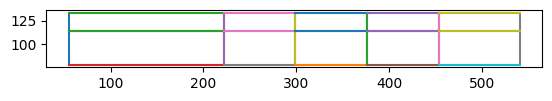

In [12]:
camelot.plot(tables[12], kind='grid').show()

In [13]:
tables[12].parsing_report

{'accuracy': 99.45, 'whitespace': 0.0, 'order': 3, 'page': 11}

In [14]:
def read_data(filename):
    data = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.replace('\'', '\"')
            line = line.replace('<', '\"')
            line = line.replace('>', '\"')
            # 用正则表达式找到所有双引号包围的数组
            # matches = re.findall(r'"\[.*?\]"', line)
            matches = re.findall(r'"\[.*\]"', line)
            for match in matches:
                # 将数组中的双引号去掉，并替换原字符串中的部分
                corrected = match.replace('\"', '')
                corrected = match[1:-1]
                line = line.replace(match, corrected)
            try:
                row_dict = json.loads(line)
            except:
                splited_line = line.split("\"inside\": ")
                s1, s2 = splited_line[0], splited_line[1]
                s2 = s2.replace("\"", "\'")
                s2 = s2.replace("\\'", "\"")
                s2 = s2 if s2[0] != "\'" else "\"" + s2[1:-2] + "\"}"
                # s2 = s2[:-2] + "}" if s2[0] == "[" and s2[-3:] == "\'}\n" else s2
                s2 = s2.replace("]\'}\n", "]}")

                formatted = s1+"\"inside\": "+s2
                try:
                    row_dict = json.loads(formatted)
                except:
                    print(s2[-3:], s2)
                    print(f"解析错误: {line}")

                    break
            data.append(row_dict)
    return data


In [15]:
data = read_data(
    '../data/test_txt/2021-04-26__新亚强硅化学股份有限公司__603155__新亚强__2020年__年度报告.txt')  

In [16]:
data = read_data(
    '../data/test_txt/2020-01-21__江苏安靠智能输电工程科技股份有限公司__300617__安靠智电__2019年__年度报告.txt')  

In [17]:
data = read_data(
    '../data/test_txt/2022-04-13__深圳世联行集团股份有限公司__002285__世联行__2021年__年度报告.txt')  

In [18]:
folder_path = './data3/chatglm_llm_fintech_raw_dataset/allpdf'
# 获取文件夹内所有文件名称
file_names = glob.glob(folder_path + '/*')
file_names = sorted(file_names, reverse=True)

In [19]:
[e for e in data if e['page'] == 'Page:12'][:3]

[{'page': 'Page:12', 'allrow': 240, 'type': 'text', 'inside': ''},
 {'page': 'Page:12',
  'allrow': 241,
  'type': 'text',
  'inside': '深圳世联行集团股份有限公司2021年年度报告全文'},
 {'page': 'Page:12',
  'allrow': 242,
  'type': 'excel',
  'inside': ['', '', '', '', '置收益']}]

In [20]:
def count_excel_blocks(data):
    excel_dict = {}
    excel_count = 0

    for i in range(len(data)):
        if data[i]['type'] == 'excel':
            excel_dict[data[i]['allrow']] = excel_count
            if i == 0 or data[i - 1]['type'] != 'excel':
                excel_count += 1
    return excel_count, excel_dict

In [21]:
page_table = [t for t in tables if t.parsing_report["page"]== 22]

In [22]:
page_table

[<Table shape=(7, 4)>, <Table shape=(8, 4)>]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9264\2454746001.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  camelot.plot(page_table[0], kind='grid').show()


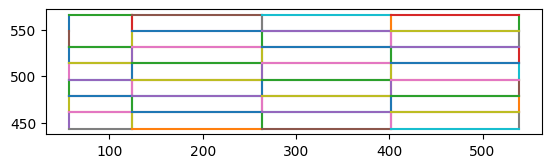

In [23]:
camelot.plot(page_table[0], kind='grid').show()

In [24]:
page_table[0].parsing_report

{'accuracy': 98.46, 'whitespace': 3.57, 'order': 1, 'page': 22}

In [25]:
page_table[0].df

,0,1,2,3
0,业务板块,2021年,2020年,2019年
1,,金额（万元） \n比例,金额（万元） \n比例,金额（万元） \n比例
2,大交易业务,"451,767.69 \n75.24%","484,756.26 \n72.98%","455,240.00 \n68.88%"
3,增长率,-6.81%,6.48%,-21.47%
4,大资管业务,"148,635.20 \n24.76%","179,450.59 \n27.02%","205,641.36 \n31.12%"
5,增长率,-17.17%,-12.74%,21.78%
6,合计,"600,402.89 \n100.00%","664,206.85 \n100.00%","660,881.36 \n100.00%"


In [26]:
df = page_table[1].df

In [27]:
df.shape

(8, 4)

In [28]:
df.loc[1,1]

'3,134.79'

In [29]:
# 列名+是+信息
def row_column_data(df):
    m, n = df.shape
    res_list = []
    for i in range(1, m):
        for j in range(0, n):
            res_list.append(f"{df.loc[i, 0]}是{df.loc[i, j]}")
    return res_list
df = df.applymap(lambda x: x.replace("\n", "") if type(x) == str else x)
res_list = row_column_data(df.replace("\n", ""))
res_list[:5]

['已结算代理销售额（亿元）是已结算代理销售额（亿元）',
 '已结算代理销售额（亿元）是3,134.79',
 '已结算代理销售额（亿元）是3,842.92',
 '已结算代理销售额（亿元）是3,568.78',
 '增长率是增长率']

In [101]:
# 列名+的+行名+是+信息
def column_row_data(df):
    m, n = df.shape
    res_list = []
    for i in range(1, m):
        for j in range(1, n):
            res_list.append(f"{df.loc[i, 0]}的{df.loc[0, j]}是{df.loc[i, j]}")
            res_list.append(f"{df.loc[0, j]}的{df.loc[i, 0]}是{df.loc[i, j]}")
    return res_list
df = df.applymap(lambda x: x.replace("\n", "") if type(x) == str else x)
res_list = column_row_data(df.replace("\n", ""))
res_list[:5]

['管理费用的2021 年是404,803,871.66',
 '2021 年的管理费用是404,803,871.66',
 '管理费用的2020 年是396,450,646.70',
 '2020 年的管理费用是396,450,646.70',
 '管理费用的同比增减是2.11%']

In [102]:
page_data = [e for e in data if e['page'] == 'Page:12']

In [103]:
def combine_pages(data):
    pages = list(sorted(set([e['page'] for e in data]), key=lambda x: int(x.split(':')[1])))

    combined_2_pages = []

    for i, _ in enumerate(pages[:-1]):
        if [e for e in data if e['page'] == pages[i]][-2]["type"] != "excel":
            continue
        if [e for e in data if e['page'] == pages[i+1]][2]["type"] != "excel":
            continue
        # print([pages[i], pages[i+1]])
        combined_2_pages.append([pages[i], pages[i+1]])
        

    combined_n_pages = []

    for i, pair in enumerate(combined_2_pages):
        if combined_n_pages and combined_n_pages[-1][1] == pair[0]:
            current_page_data = [e for e in data if e['page'] == pair[0]]
            current_page_data = all(e['type'] == "excel" for e in current_page_data[2:-2])
            combined_n_pages[-1].append(pair[1])
        else:  # 没有找到匹配的集合，新建一个
            combined_n_pages.append(pair)

    return combined_n_pages


In [104]:
print(combine_pages(data))

[['Page:6', 'Page:7'], ['Page:11', 'Page:12'], ['Page:27', 'Page:28'], ['Page:29', 'Page:30'], ['Page:34', 'Page:35'], ['Page:37', 'Page:38', 'Page:39'], ['Page:39', 'Page:40', 'Page:41'], ['Page:61', 'Page:62', 'Page:63'], ['Page:67', 'Page:68', 'Page:69'], ['Page:74', 'Page:75'], ['Page:95', 'Page:96'], ['Page:101', 'Page:102'], ['Page:104', 'Page:105'], ['Page:106', 'Page:107'], ['Page:135', 'Page:136'], ['Page:138', 'Page:139'], ['Page:140', 'Page:141'], ['Page:142', 'Page:143'], ['Page:144', 'Page:145', 'Page:146'], ['Page:147', 'Page:148'], ['Page:150', 'Page:151'], ['Page:181', 'Page:182'], ['Page:192', 'Page:193'], ['Page:199', 'Page:200'], ['Page:201', 'Page:202'], ['Page:204', 'Page:205'], ['Page:206', 'Page:207'], ['Page:211', 'Page:212', 'Page:213'], ['Page:214', 'Page:215'], ['Page:218', 'Page:219', 'Page:220'], ['Page:220', 'Page:221', 'Page:222'], ['Page:233', 'Page:234'], ['Page:235', 'Page:236', 'Page:237'], ['Page:239', 'Page:240', 'Page:241'], ['Page:248', 'Page:249'

In [105]:
d = count_excel_blocks(page_data)

# 提取大纲

In [106]:
def is_title(e):
    n = len(e['inside'])
    if e['type'] != 'text':
        return False
    if n > 2 and e['inside'][0] in ("第", "（", "("):
        return True
    if n > 1 and e['inside'][0] in "一二三四五六七八九十":
        return True
    if n > 1 and e['inside'][:2] in [f"{i}{l}" for i in range(10) for l in ['.', '、']]:
        return True
    if n > 3 and e['inside'][:3] in [f"{i}{l}" for i in range(10, 50) for l in ['.', '、']]:
        return True
    if n > 2 and e['inside'][:2] in [f"{i}{l}" for i in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ" for l in ['.', '、']]:
        return True
    return False

In [107]:
level = [e for e in data if is_title(e)]

In [108]:
with open("../data/test_temp/outline.txt", "w") as f:
    for e in level:
        print(e['inside'])
        f.write(e['inside']+"\n")

第一节重要提示、目录和释义
第一节重要提示、目录和释义................................................2
第二节公司简介和主要财务指标..............................................9
第三节管理层讨论与分析..................................................14
第四节公司治理..........................................................51
第五节环境和社会责任....................................................70
第六节重要事项..........................................................71
第七节股份变动及股东情况................................................123
第八节优先股相关情况...................................................129
第九节债券相关情况.....................................................130
第十节财务报告.........................................................131
第十一节备查文件目录...................................................314
第二节公司简介和主要财务指标
一、公司信息
二、联系人和联系方式
三、信息披露及备置地点
四、注册变更情况
五、其他有关资料
六、主要会计数据和财务指标
七、境内外会计准则下会计数据差异
1、同时按照国际会计准则与按照中国会计准则披露的财务报告中净利润和净资产差异情况
2、同时按照境外会计准则与按照中国会计准则披露的财务报告中净利润和净资产差异情况
八、分季度主要财务指标
九、非经常性损益项目及金额
第三节管理层讨论与分析
一、报告期内公司所处的行业情况
第一，疫情、通胀、发达经济体货币政策调整以及俄乌冲突构成当前全球经济发展的重

In [109]:
for e in level:
    if e["allrow"] < 133 or e["allrow"] >= 290:
        continue
    print(e["allrow"], e['inside'])

133 第二节公司简介和主要财务指标
134 一、公司信息
153 二、联系人和联系方式
161 三、信息披露及备置地点
168 四、注册变更情况
179 五、其他有关资料
189 六、主要会计数据和财务指标
216 七、境内外会计准则下会计数据差异
217 1、同时按照国际会计准则与按照中国会计准则披露的财务报告中净利润和净资产差异情况
220 2、同时按照境外会计准则与按照中国会计准则披露的财务报告中净利润和净资产差异情况
223 八、分季度主要财务指标
233 九、非经常性损益项目及金额


In [110]:
tables[30].parsing_report

{'accuracy': 98.38, 'whitespace': 22.86, 'order': 3, 'page': 27}

In [111]:
df1, df2 = tables[30].df, tables[31].df

In [112]:
tables[31].parsing_report

{'accuracy': 96.76, 'whitespace': 0.0, 'order': 1, 'page': 28}

In [113]:
df1

,0,1,2,3,4,5,6
0,业务类别,2021年,,2020年,,2019年,
1,,毛利,毛利率,毛利,毛利率,毛利,毛利率
2,,金额（万元） 占比,,金额（万元） \n占比,,金额（万元） \n占比,
3,代理销售业务,"59,555.39 \n64.98%",24.80%,"81,458.34 101.62%",27.20%,"67,490.26 \n79.95%",23.64%
4,增长率,-26.89%,-2.40%,20.70%,3.56%,-35.43%,-7.88%


In [114]:
with open("../data/test_temp/plain.txt", "w") as f:
    keyword = set()

    for t in tables:
        df = t.df
        df = df.applymap(lambda x: x.replace("\n", "") if type(x) == str else x)

        plain_txt_list = []

        if df.shape[1] > 2:
            plain_txt_list = column_row_data(df)
        if df.shape[1] == 2:
            plain_txt_list = row_column_data(df)

        plain_txt_list = set(plain_txt_list)

        for txt in plain_txt_list:
            if "指是指" in txt:
                continue
            if txt[-1] in ["是","指"]:
                continue
            if txt[0] in ["的"]:
                continue
            if txt[0].isdigit() and (not txt[1].isdigit()):
                continue
            if txt.count("%") >= 2:
                continue
            if len(txt) < 2:
                continue
            if "是" in txt:
                s = txt.split('是')
                if s[0] == s[1]:
                    continue
                if s[0] in keyword:
                    continue
                keyword.add(s[0])
            f.write(txt+'\n')

In [115]:
tables[12].df.shape[1]

5

In [116]:
level_set = set([e['inside'] for e in level])


In [117]:
from transformers import AutoTokenizer
base_tokenizer_model = 'D:\\code\\llm\\embeding\\text2vec-base-chinese-paraphrase'
tokenizer = AutoTokenizer.from_pretrained(base_tokenizer_model)

In [118]:
with open("../data/test_temp/topic.txt", "w") as f:
    topic_dict = {"level":"", "n":"", "content":""}
    for d in data:
        if d['type'] != 'text':
            continue
        if d['inside'] in level_set:
            topic_dict["content"] = topic_dict["content"].replace('\n', '')
            new_text = ''
            n = 0
            for text in topic_dict["content"]:
                new_text += text
                if text[-1] in ['.', '!', '?', '。', '！', '？', '…', ';', '；', ':', '：', '”', '’', '）', '】', '》', '」',
                                '』', '〕', '〉', '》', '〗', '〞', '〟', '»', '"', "'", ')', ']', '}']:
                    input_tokens = tokenizer(new_text)
                    if len(input_tokens['input_ids']) > 150 and new_text:
                        new_text = new_text.replace(' ', '')
                        f.write(new_text)
                        f.write('\n')
                        if len(input_tokens['input_ids']) > 256:
                            print("too long")
                            f.write(new_text[200:])
                            f.write('\n')
                        new_text = ''

            topic_dict = {"level":"", "content":""}
            topic_dict['level'] = d['inside']
        else:
            topic_dict["content"] += " " + d['inside']


too long
too long


In [119]:
texts="回顾2021年，这一年是我国“十四五”的开端之年，“新冠”疫情仍在海外肆虐，反复变异的病毒不断突破防线，国内外环境复杂严峻。在中央坚强领导下，我国经济发展和疫情防控保持全球领先地位，疫情全局可控，局部虽有反复，但各行各业的生产经营活动基本恢复正常。 2021年，我国房地产市场前高后低，经历了从上半年热度较高到下半年快速转冷的转变。上半年信贷环境相对宽松，加之去年低基数效应，全国商品房销售规模增幅显著，在长三角、大湾区、西部核心城市、福建等带领下商品房销售量价齐升，土地市场保持较高热度。下半年，随着热点城市调控加码以及房地产贷款收紧政策效应的逐渐显现，房地产市场从销售到开工到房地产开发投资，均出现了快速的回落，其中销售下行的幅度更为明显。商品房销售面积自7月以来快速回落，单月销售面积同比降幅最高达22%，7月以后销售规模甚至低于2019年同期水平。多数地区价格战激烈，二线城市郊县和非核心城市群的三四线城市尤甚，分化进一步加剧。四季度后行业信贷环境改善，预期持续增强，但需求端仍然疲弱，不同城市市场分化格局仍较为突出。 全年全国商品房销售面积17.94亿平方米，同比增长1.9%；销售额18.19万亿元，同比增长4.8%。全国房地产开发投资14.76万亿元，同比增长4.4%；其中，住宅开发投资同比增长6.4%，占房地产开发投资的比重为75.3%。全国房屋新开工面积19.89亿平方米，同比减少11.4%；竣工10.14亿平方米，同比增长11.2%。 截止年底，全国商品房待售面积5.10亿平方米，同比增长2.4%。 政策方面，中央延续“房住不炒”总基调，全面落实行业长效机制：从房企融资“三道红线”、银行房贷“两集中”到预售资金监管等，房地产金融审慎监管持续完善；房地产融资持续下降，其中房地产贷款增速创8年新低，房企降杠杆成效逐渐显现；核心城市“集中供地”全面落地，集中供地首批火热，二批次明显降温，规则不断调整；住房保障体系加快完善，保障性租赁住房建设加速。地方全面落实因城施策，热点城市持续高频加码调控。 伴随市场下行，在融资环境收紧、商品房销售持续转弱的背景下，开发商流动性持续恶化，部分房企信用风险加大。下半年以来，境内外市场信用债出现了大规模的违约，离岸美元债市场净融资额创历史新低，行业整体流动性压力陡增。 展望2022年，我国经济发展的内外环境依然严峻复杂，我国房地产市场预计将迎来政策持续回暖、市14  深圳世联行集团股份有限公司2021年年度报告全文 场逐步修复、增速前低后高的发展态势，同时市场整合与分化将加速演变。 "
input_tokens = tokenizer(texts)
len(texts), len(input_tokens['input_ids'])

(1075, 1036)